# K-means, Sample Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

### 데이터 준비
- 샘플 만들어서 사용

In [7]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 150, centers = 3, n_features=2, cluster_std=0.5,random_state=0)

(150, 2)

In [9]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [10]:
X[:5]

array([[2.60509732, 1.22529553],
       [0.5323772 , 3.31338909],
       [0.802314  , 4.38196181],
       [0.5285368 , 4.49723858],
       [2.61858548, 0.35769791]])

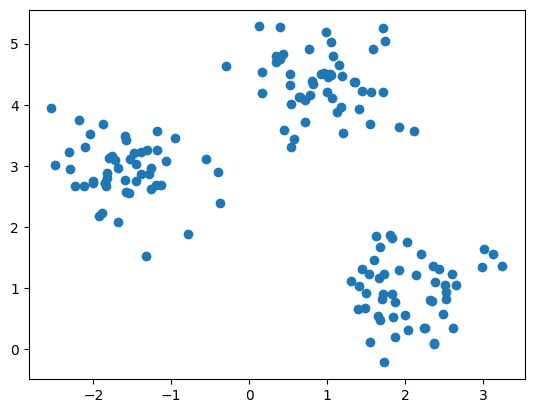

In [14]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### 학습

In [19]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, random_state=2022 )
km.fit(X)


C:\Users\023\anaconda3\envs\flyai\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2022)

In [21]:
y_pred = km.predict(X)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       1, 1, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0,
       0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1,
       2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0])

In [22]:
df = pd.DataFrame(X, columns=['X_1','X_2'])
df.head()

,X_1,X_2
0,2.605097,1.225296
1,0.532377,3.313389
2,0.802314,4.381962
3,0.528537,4.497239
4,2.618585,0.357698


In [24]:
df['y_pred'] = y_pred
df.head()

,X_1,X_2,y_pred
0,2.605097,1.225296,0
1,0.532377,3.313389,1
2,0.802314,4.381962,1
3,0.528537,4.497239,1
4,2.618585,0.357698,0


In [28]:
centroid = km.cluster_centers_

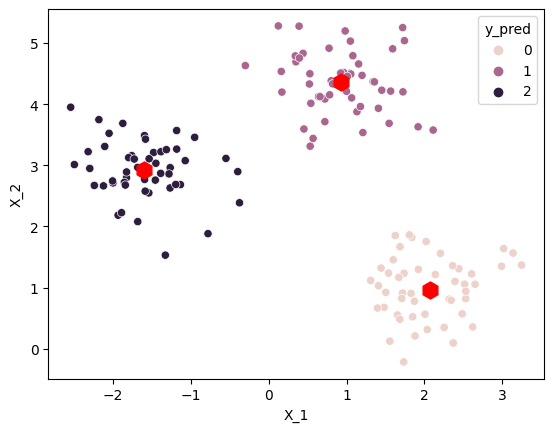

In [34]:
sns.scatterplot(data = df, x ='X_1', y = 'X_2', hue = 'y_pred')
plt.scatter(centroid[:, 0], centroid[:, 1],
           s = 150, marker = 'h', c = 'red')

### elbow method

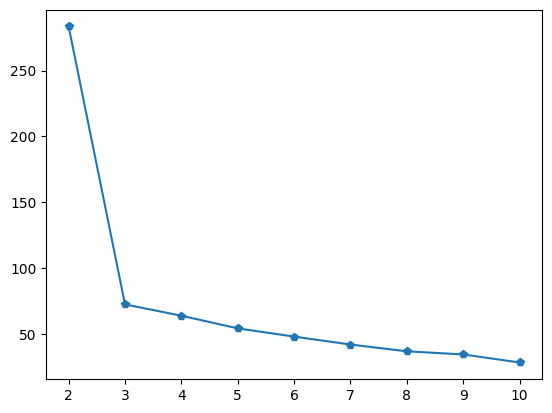

In [45]:
inertia = []
for k in range(2,11):
    #fit
    km = KMeans(n_clusters = k, n_init = 'auto', random_state=2022)
    km.fit(X)
    #inertia_
    #append
    inertia.append(km.inertia_)
plt.plot(range(2,11), inertia, marker='p')
plt.show()

# Iris 데이터를 사용해서 KMeans

### 데이터 읽어오기

In [47]:
from sklearn import datasets

iris = datasets.load_iris()

In [48]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [51]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [66]:
df = df.iloc[:,:2]
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

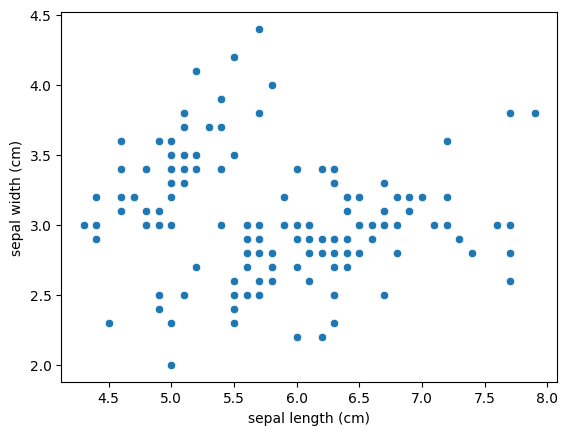

In [69]:
sns.scatterplot(data = df, x ='sepal length (cm)', y = 'sepal width (cm)')

In [70]:
df['target'] = iris.target
df.head()

C:\Users\023\AppData\Local\Temp\ipykernel_16864\3528502109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = iris.target


,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

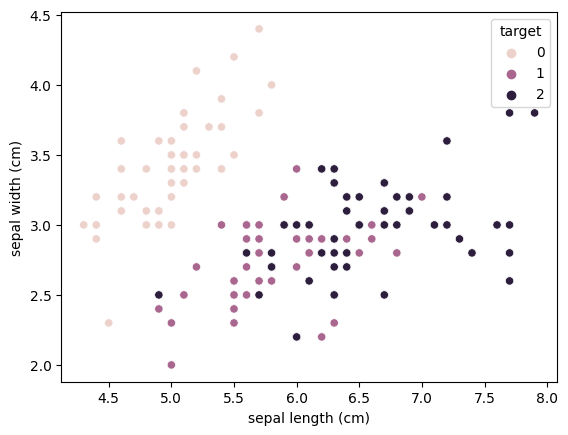

In [82]:
sns.scatterplot(data = df, x ='sepal length (cm)', y = 'sepal width (cm)', hue = 'target')

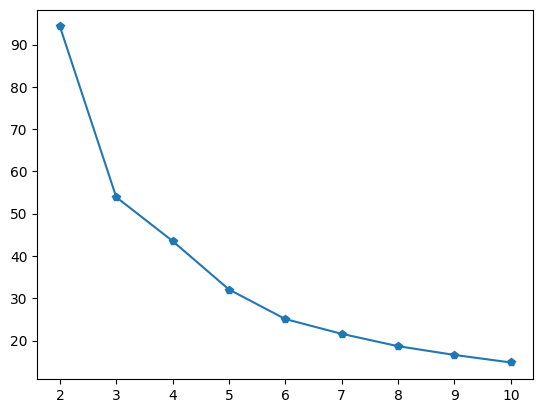

In [75]:
inertia = []
for k in range(2,11):
    #fit
    km = KMeans(n_clusters = k, n_init = 'auto', random_state=2022)
    km.fit(df)
    #inertia_
    #append
    inertia.append(km.inertia_)
plt.plot(range(2,11), inertia, marker='p')
plt.show()

In [83]:
km = KMeans(n_clusters = 3, n_init = 'auto', random_state=2022)
km.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=2022)

In [84]:
# 중심점좌표
centroid = km.cluster_centers_
centroid

array([[6.82391304, 3.07826087],
       [5.8       , 2.7       ],
       [5.00392157, 3.40980392]])

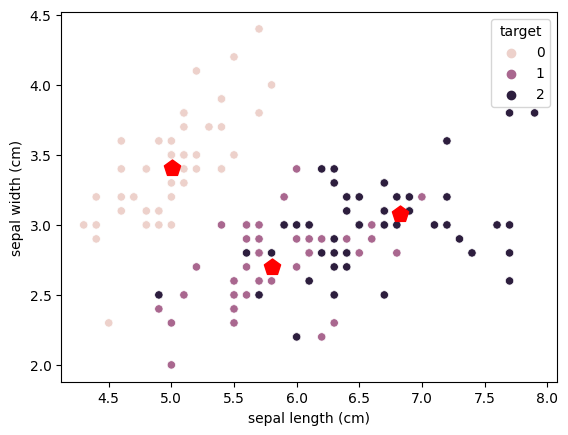

In [89]:
sns.scatterplot(data = df, x ='sepal length (cm)', y = 'sepal width (cm)', hue = 'target')
plt.scatter(centroid[:, 0], centroid[:, 1],
           s = 150, marker = 'p', c = 'red')